In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# importing the dataset
df = pd.read_table('SMSSpamCollection',sep='\t',names=['label','message'])

In [3]:
# printing the first five columns
df.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [4]:
print("The number of rows in the dataaset",df.shape[0])
print("the number of columns in the dataset", df.shape[1])

The number of rows in the dataaset 5572
the number of columns in the dataset 2


In [5]:
# checking the number of null values
df.isnull().sum(axis = 0)

label      0
message    0
dtype: int64

In [6]:
print("There are no null values in the dataset")

There are no null values in the dataset


<AxesSubplot:>

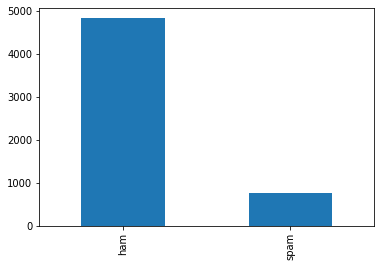

In [7]:
# checking the skweness of the dataset
df['label'].value_counts().plot.bar()

In [8]:
print("My dataset is highly skewed , so I will not use accuracy as my metric, So i will use precesion, recall and AUC as my metrics")

My dataset is highly skewed , so I will not use accuracy as my metric, So i will use precesion, recall and AUC as my metrics


In [9]:
# Now converting the output label to interger, 0 for no spam and 1 for spam
df.label = df.label.map({'ham':0, 'spam':1})
# now printng the first rows after the mapping
df.head()

,label,message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [10]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df['message'], df['label'], test_size = 0.3, random_state = 1)

print("The number of rows in dataset {}".format(df.shape[0]))
print("The number of rows in training dataset {}".format(x_train.shape[0]))
print("The number of rows in my testing datasst {}".format(x_test.shape[0]))

The number of rows in dataset 5572
The number of rows in training dataset 3900
The number of rows in my testing datasst 1672


In [11]:
# Now import CountVectorizer class to convert our messages into BOWs
from sklearn.feature_extraction.text import CountVectorizer

# creating a object of CountVectorizer class
count_vector = CountVectorizer()

x_train = count_vector.fit_transform(x_train)
x_test = count_vector.transform(x_test)

In [12]:
# since the naive bayes works very well on text data, we will use MultinomilaNB from naive_bayes
from sklearn.naive_bayes import MultinomialNB
mnb = MultinomialNB()
mnb.fit(x_train, y_train)

MultinomialNB()

In [13]:
predictions = mnb.predict(x_test)

In [14]:
from sklearn.metrics import precision_score, recall_score, roc_auc_score
print("The precision Score is {}".format(precision_score(y_test, predictions)))
print("The recall Score is {}".format(recall_score(y_test, predictions)))
print("The AUC Score is {}".format(roc_auc_score(y_test, predictions)))

The precision Score is 0.9728506787330317
The recall Score is 0.9347826086956522
The AUC Score is 0.9653108605198095
